In [35]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def read_lines(file_name):
    with open('./' + file_name, 'r') as f:
        lines = f.read().splitlines()
    return lines

def count_word_freq(lines):
    freq_dict = dict()
    for line in lines:
        words = line.split(" ")
        for word in words:
            if word in freq_dict:
                freq_dict[word] += 1
            else:
                freq_dict[word] = 1
    return freq_dict

def create_word_freq_tuples(freq_dict):
    word_freq_tuples = []
    for term in freq_dict:
        word_freq_tuples.append((term, freq_dict[term]))
    return word_freq_tuples

def sort_word_freq_tuples(word_freq_tuples):
    return sorted(word_freq_tuples, key=lambda x: x[1], reverse=True)

In [31]:
file_name = "processed_bible_page.txt"

In [32]:
lines = read_lines(file_name)

[('shall', 9840), ('unto', 8997), ('lord', 8006), ('thou', 5474), ('god', 4716)]


[('shall', 9840), ('unto', 8997), ('lord', 8006), ('thou', 5474), ('god', 4716), ('thi', 4600), ('said', 3999), ('ye', 3987), ('thee', 3827), ('son', 3486), ('king', 2883), ('1', 2830), ('upon', 2750), ('man', 2735), ('2', 2724), ('day', 2615), ('israel', 2575), ('3', 2571), ('say', 2532), ('4', 2476), ('7', 2351), ('5', 2309), ('6', 2297), ('hath', 2264), ('9', 2210), ('8', 2193), ('hous', 2160), ('peopl', 2148), ('10', 2120), ('11', 2101), ('came', 2093), ('come', 2089), ('one', 2048), ('12', 1968), ('hand', 1943), ('13', 1905), ('14', 1866), ('children', 1821), ('15', 1794), ('also', 1771), ('land', 1767), ('thing', 1706), ('16', 1691), ('men', 1677), ('father', 1675), ('shalt', 1616), ('go', 1610), ('18', 1601), ('19', 1515), ('let', 1512)]


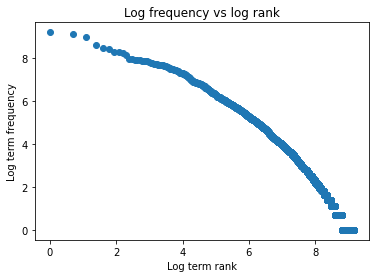

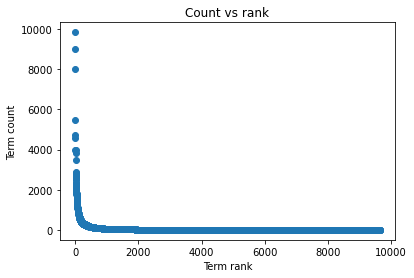

In [42]:
freq_dict = count_word_freq(lines)
word_freq_tuples = create_word_freq_tuples(freq_dict)
sorted_word_freq_tuples = sort_word_freq_tuples(word_freq_tuples)

# Print frequency of the first 50 unique words:
print(sorted_word_freq_tuples[:50])

# Plot log-log rank vs frequency.
x = np.array(range(len(sorted_word_freq_tuples))) + 1
y = np.array([x[1] for x in sorted_word_freq_tuples])

plt.scatter(np.log(x), np.log(y))
plt.title("Log frequency vs log rank")
plt.xlabel("Log term rank")
plt.ylabel("Log term frequency")
plt.show()

# Plot count vs rank.
x = np.array(range(len(sorted_word_freq_tuples))) + 1
y = [x[1] for x in sorted_word_freq_tuples]

plt.scatter(x, y)
plt.title("Count vs rank")
plt.xlabel("Term rank")
plt.ylabel("Term count")
plt.show()

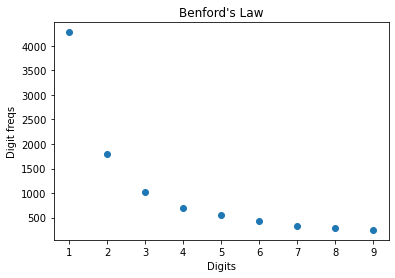

In [51]:
# Exploring Benford's Law.
digit_freqs = [0] * 10
for word_freq_tuple in sorted_word_freq_tuples:
    first_digit = int(str(word_freq_tuple[1])[0])
    digit_freqs[first_digit] += 1

digits = np.array(range(1, 10))
digit_freqs = np.array(digit_freqs[1:])
plt.scatter(digits, digit_freqs)
plt.xlabel("Digits")
plt.ylabel("Digit freqs")
plt.title("Benford's Law")
plt.show()

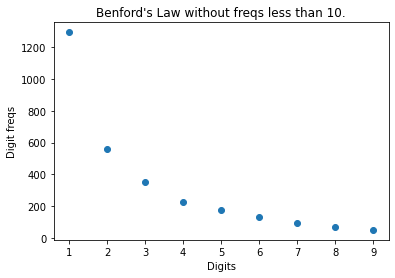

In [53]:
# Benford's Law without word frequencies which are less than 10.
digit_freqs = [0] * 10
for word_freq_tuple in sorted_word_freq_tuples:
    if word_freq_tuple[1] >= 10:
        first_digit = int(str(word_freq_tuple[1])[0])
        digit_freqs[first_digit] += 1

digits = np.array(range(1, 10))
digit_freqs = np.array(digit_freqs[1:])
plt.scatter(digits, digit_freqs)
plt.xlabel("Digits")
plt.ylabel("Digit freqs")
plt.title("Benford's Law without freqs less than 10.")
plt.show()

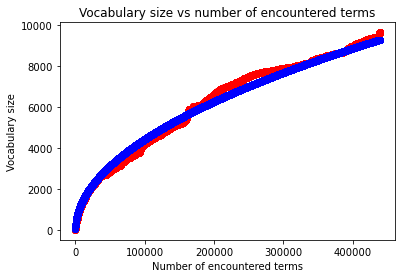

In [78]:
# Exploring Heap's Law.
terms_encountered = set()
nr_terms = 0
step = 10
x = []
y = []

for line in lines:
    words = line.split(" ")
    for word in words:
        terms_encountered.add(word)
        nr_terms += 1
        if nr_terms % step == 0:
            x.append(nr_terms)
            y.append(len(terms_encountered))

k = 14
b = 0.5
fit_y = []
for ii in range(len(x)):
    fit_y.append(k * x[ii] ** b)
            
x = np.array(x)
y = np.array(y)
fit_y = np.array(fit_y)
plt.scatter(x, y, color='r')
plt.scatter(x, fit_y, color='b')
plt.xlabel("Number of encountered terms")
plt.ylabel("Vocabulary size")
plt.title("Vocabulary size vs number of encountered terms")
plt.show()